<a href="https://colab.research.google.com/github/Davs90/Portfolio/blob/main/SuperstoreSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VENTAS SUPER STORE
## Librerias Necesarias

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
all_data = pd.read_csv("train.csv")
all_data.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
print(all_data)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

# Limpiar la data

In [7]:
# SI hay datos NaN los dropiamos

nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
#Revisamos que se dropeo
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04


In [9]:
# Agregar columna meses
# 1. Convertir la columna a tipo datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%d/%m/%Y')

# 2. Extraer el mes directamente
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Year'] = all_data['Order Date'].dt.year
all_data.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016


# EXPLORACION DE DATOS
cual es el mes con mas ventas?

In [10]:
ventas_por_periodo=all_data.groupby(['Year', 'Month'])['Sales'].sum()
print(ventas_por_periodo)

Year  Month
2015  1         14205.7070
      2          4519.8920
      3         55205.7970
      4         27906.8550
      5         23644.3030
      6         34322.9356
      7         33781.5430
      8         27117.5365
      9         81623.5268
      10        31453.3930
      11        77907.6607
      12        68167.0585
2016  1         18066.9576
      2         11951.4110
      3         32339.3184
      4         34154.4685
      5         29959.5305
      6         23599.3740
      7         28608.2590
      8         36818.3422
      9         63133.6060
      10        31011.7375
      11        75249.3995
      12        74543.6012
2017  1         18542.4910
      2         22978.8150
      3         51165.0590
      4         38679.7670
      5         56656.9080
      6         39724.4860
      7         38320.7830
      8         30542.2003
      9         69193.3909
      10        59583.0330
      11        79066.4958
      12        95739.1210
2018  1         

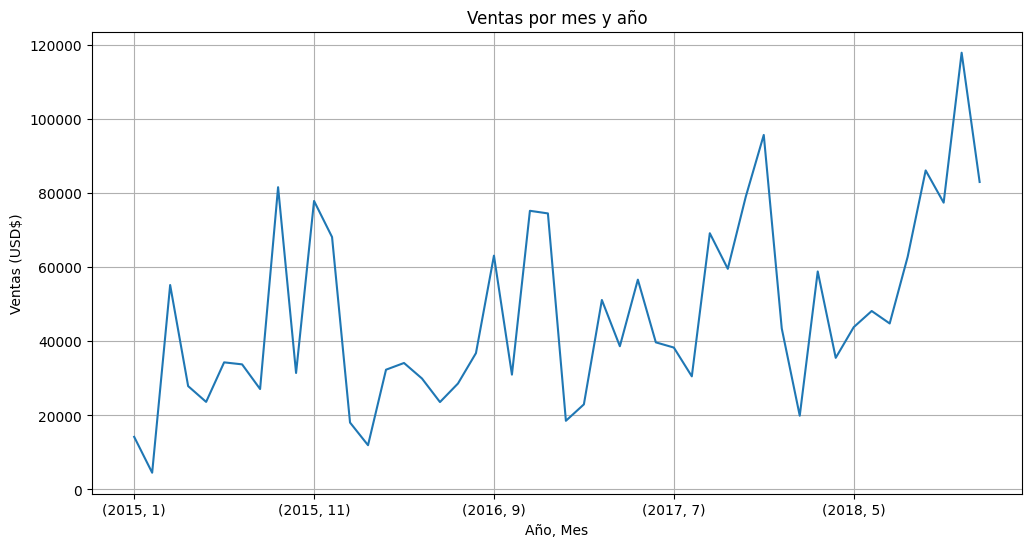

In [11]:
ventas_por_periodo.plot(kind='line', figsize=(12, 6))

# Personalizar el gráfico
plt.title('Ventas por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas (USD$)')
plt.grid(True)
plt.show()

In [20]:
ventas_por_ciudad=all_data.groupby(['Country', 'State', 'City'])['Sales'].sum()
ventas_por_categoria=all_data.groupby(['Category', 'Sub-Category'])['Sales'].sum()
print(ventas_por_ciudad)
print(ventas_por_categoria)

Country        State      City      
United States  Alabama    Auburn        1766.830
                          Decatur       3374.820
                          Florence      1997.350
                          Hoover         525.850
                          Huntsville    2484.370
                                          ...   
               Wisconsin  Superior      1299.730
                          Waukesha        54.500
                          Wausau         317.480
                          West Allis     250.480
               Wyoming    Cheyenne      1603.136
Name: Sales, Length: 600, dtype: float64
Category         Sub-Category
Furniture        Bookcases       113813.1987
                 Chairs          322822.7310
                 Furnishings      89212.0180
                 Tables          202810.6280
Office Supplies  Appliances      104618.4030
                 Art              26705.4100
                 Binders         200028.7850
                 Envelopes        1612

In [13]:
top_10_ciudades = ventas_por_ciudad.sort_values(ascending=False)
top_10_ciudades.head(10)

Country        State         City         
United States  New York      New York City    252462.5470
               California    Los Angeles      173420.1810
               Washington    Seattle          116106.3220
               California    San Francisco    109041.1200
               Pennsylvania  Philadelphia     108841.7490
               Texas         Houston           63956.1428
               Illinois      Chicago           47820.1330
               California    San Diego         47521.0290
               Michigan      Detroit           42446.9440
               Florida       Jacksonville      39133.3280
Name: Sales, dtype: float64

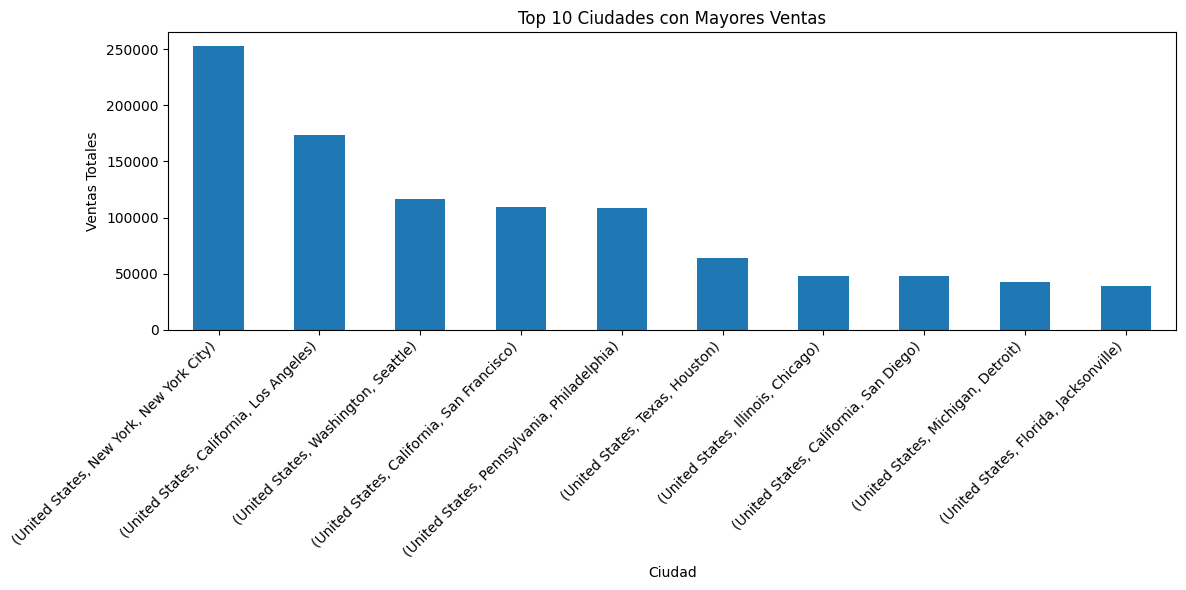

In [15]:
top_10_ciudades = ventas_por_ciudad.sort_values(ascending=False).head(10)

# Graficar los resultados
plt.figure(figsize=(12, 6)) # Define el tamaño del gráfico
top_10_ciudades.plot(kind='bar')

# Añadir etiquetas y título
plt.title('Top 10 Ciudades con Mayores Ventas')
plt.xlabel('Ciudad')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para que no se superpongan
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se corten

# Mostrar el gráfico
plt.show()

¿ Producto Mas vendido ?

In [28]:
ventas_por_producto=all_data.groupby(['Product Name'])['Sales'].sum()
print(ventas_por_producto)

Product Name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              379.214
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

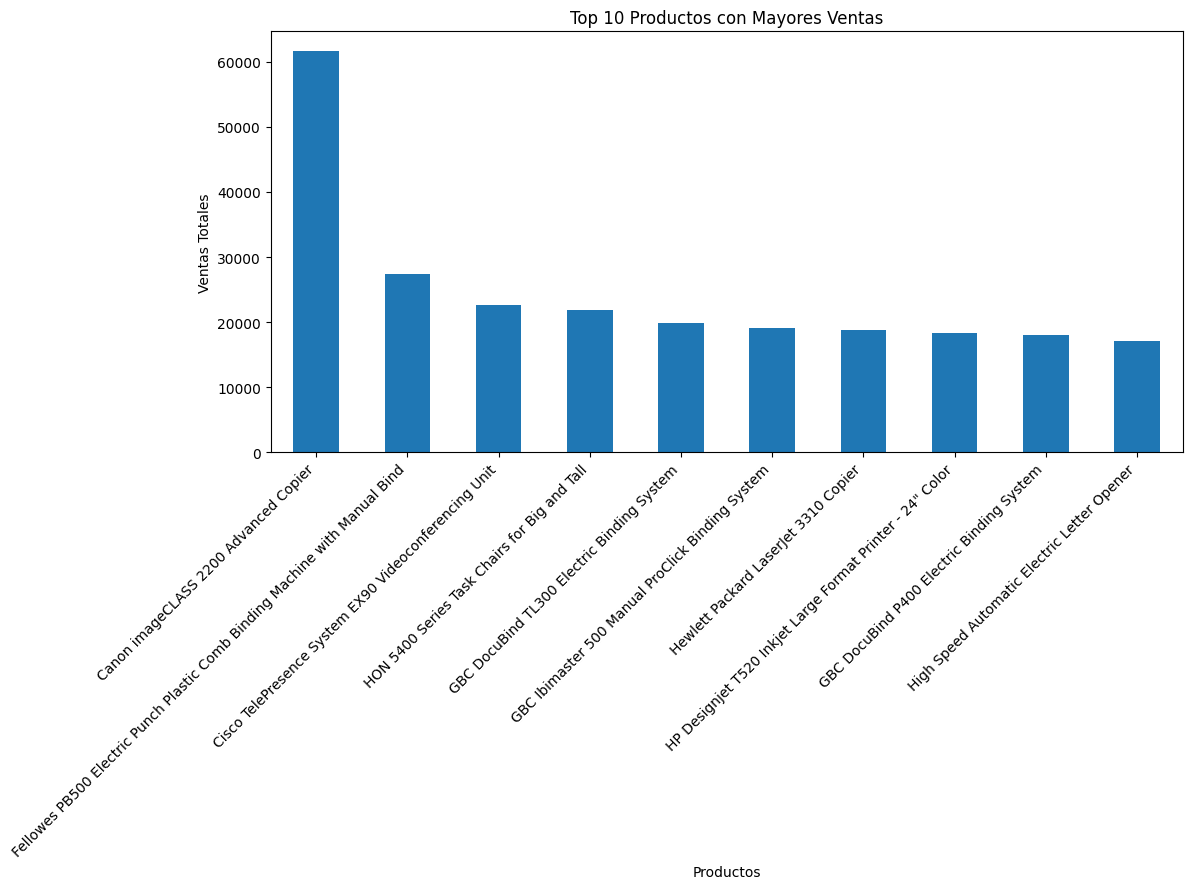

In [29]:
top_10_productos = ventas_por_producto.sort_values(ascending=False).head(10)
# Graficar los resultados
plt.figure(figsize=(12, 9)) # Define el tamaño del gráfico
top_10_productos.plot(kind='bar')

# Añadir etiquetas y título
plt.title('Top 10 Productos con Mayores Ventas')
plt.xlabel('Productos')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para que no se superpongan
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se corten

# Mostrar el gráfico
plt.show()